<a href="https://colab.research.google.com/github/Eric1891/Micro-Credential-winter-2022/blob/main/K2_nearest_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [ ]:
#importing libraries
#computes a wide variety of mathematical operations on arrays
import numpy as np
#plots figures
import matplotlib.pyplot as plt
#for reading and analyzing csv files
import pandas as pd

## Importing the dataset

In [ ]:

dataset = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/Social_Network_Ads.csv')
#assigning x values from dataset (column 2 and 3)
X = dataset.iloc[:, [2, 3]].values 
#assigning y values from dataset(last column)
y = dataset.iloc[:, -1].values

In [ ]:
dataset.shape

(400, 5)

In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Splitting the dataset into the Training set and Test set

In [ ]:
# importing train_test_split function from sklearn.model_selection that split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split
#assigning 25% of the data for testing and 75% for training
#random_state controls the shuffling applied to the data before applying the split, all of split and test data will be the same if we assign random_state to any integer value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

sklearn.preprocessing package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.

In [ ]:
#impoertind Standard scalar function from sklearn.preprocessing 
#StandarScaler Standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
#define sc
sc = StandardScaler() 
#training and transforming our train data using fit.tranform function
X_train = sc.fit_transform(X_train)
#transforming our test data 
X_test = sc.transform(X_test)

## Training the K-NN model on the Training set

sklearn.neighbors provides functionality for unsupervised and supervised neighbors-based learning methods.
KNeighborsClassfier implements learning based on the  nearest neighbors of each query point, where  is an integer value specified by the user.

In [ ]:
#importing KneighborsClassifier function from sklearn.neighbors library 
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
#n_neighbors defines number of neighbors to use for kneighbors queries
#The distance metric to use for the tree. 
#The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric (calculates distance between two points)

classifier.fit(X_train, y_train)
#training our data

KNeighborsClassifier()

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
#define our predicted values using x_test values and predict function

## Making the Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. ... The classifier made a total of 165 predictions (e.g., 165 patients were being tested for the presence of that disease)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#Computes confusion matrix to evaluate the accuracy of a classification.
print(cm)
#prints the confusion matrix

[[64  4]
 [ 3 29]]


## Visualising the Training set results

The numpy.meshgrid function is used to create a rectangular grid out of two given one-dimensional arrays representing the Cartesian indexing or Matrix indexing

The numpy module of Python provides a function called numpy. ravel, which is used to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array (a two-dimensional and multi-dimensional array that is stored as a one-dimensional array)

enumerate() allows us to iterate through a sequence but it keeps track of both the index and the element. The enumerate() function takes in an iterable as an argument, such as a list, string, tuple, or dictionary.

In [ ]:
x1_min = X_set[:, 0].min()
x1_min

NameError: ignored

In [ ]:
x1_max = X_set[:, 0].max()
x1_max

In [ ]:
x2_min = X_set[:, 1].min() - 1
x2_min

In [ ]:
x2_max = X_set[:, 1].max() + 1
x2_max

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


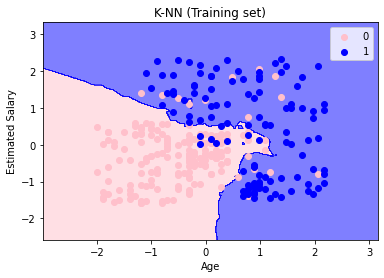

In [ ]:
#importing ListedColormap from colors in matplotlib
from matplotlib.colors import ListedColormap
#assigning x and y to the training x and y values
X_set, y_set = X_train, y_train
#giving a range of values for the rectangular grid with 0.01 increment from start to stop
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
#The contourf function uses the current colormap to fill the spaces between the levels in the plot
#The alpha blending value, between 0 (transparent) and 1 (opaque).
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('pink', 'blue')))
#sets limits for the x axis
plt.xlim(X1.min(), X1.max())
#sets limits for the y axis
plt.ylim(X2.min(), X2.max())

#using enumerate looping function to do a scatter plot
#for i, j, iterate through the unique values of the y_set
#i count (i enumerates), j assigns values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('pink', 'blue'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


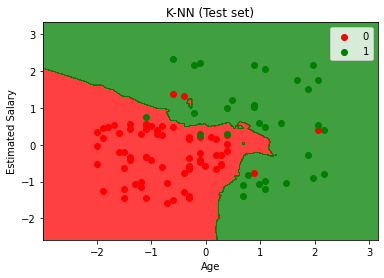

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()